In [1]:
import os
import get_geedata
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Consulta de datos
### Inputs del código
 
 * Archivo csv con las coordendas, dichos datos deben estar en WGS84 (longitud | latitud).
 * Periodo en el cual se realizará la descarga.
 

### Extraer datos NOAA y resumirlos a nivel diario

In [2]:
## conusltar las imageens disponibles en google earth engine para la misión en específico
datainit = get_geedata.gee_weatherdata("2017-01-01","2020-01-31", "data/truestationlocation.csv", mission = "noaa")
datainit.features

,longitude,latitude,index
0,-78.62869,-5.65875,1
1,-78.69203,-5.64777,2


Señalar que bandas serán resumidas por promedio, sumatario, mínimio o máximo.
Para mayor información consultar las bandas en: https://developers.google.com/earth-engine/datasets/catalog/NOAA_CFSV2_FOR6H 

In [3]:

avgbands =  ['Specific_humidity_height_above_ground', 
             'Pressure_surface']

sumbands = ['Downward_Short-Wave_Radiation_Flux_surface_6_Hour_Average',
            'Upward_Short-Wave_Radiation_Flux_surface_6_Hour_Average',
            'Precipitation_rate_surface_6_Hour_Average',
            'Potential_Evaporation_Rate_surface_6_Hour_Average']

minbands = ['Minimum_temperature_height_above_ground_6_Hour_Interval']
maxbands = ['Maximum_temperature_height_above_ground_6_Hour_Interval']


In [4]:
## extracción de los datos

noaadata= datainit.summarise_hourlydata(averagecols=avgbands,
                       cummulativecols=sumbands,
                       minimumcols = minbands,
                       maximumcols = maxbands)

average features processed
cummulative features processed
minimum features processed
maximum features processed


In [5]:
noaadata.head()

,Downward_Short-Wave_Radiation_Flux_surface_6_Hour_Average,Upward_Short-Wave_Radiation_Flux_surface_6_Hour_Average,Precipitation_rate_surface_6_Hour_Average,Potential_Evaporation_Rate_surface_6_Hour_Average,Specific_humidity_height_above_ground,Pressure_surface,Maximum_temperature_height_above_ground_6_Hour_Interval,Minimum_temperature_height_above_ground_6_Hour_Interval,date,longitude,latitude
0,1198.0,204.0,0.000000,1919.0,0.011363,90977.5,300.799988,287.799988,2017-01-01,-78.62869,-5.65875
1,1198.0,204.0,0.000000,1919.0,0.011363,90977.5,300.799988,287.799988,2017-01-01,-78.69203,-5.64777
2,1094.0,186.0,0.000004,1771.0,0.011061,91030.0,301.600006,289.200012,2017-01-02,-78.62869,-5.65875
3,1094.0,186.0,0.000004,1771.0,0.011061,91030.0,301.600006,289.200012,2017-01-02,-78.69203,-5.64777
4,1293.0,219.0,0.000000,2300.0,0.011008,90817.5,303.200012,288.500000,2017-01-03,-78.62869,-5.65875


   longitude  latitude  index
0  -78.62869  -5.65875      1
1  -78.69203  -5.64777      2


C:\Users\aaguilar\miniconda3\envs\gee_NOAA\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


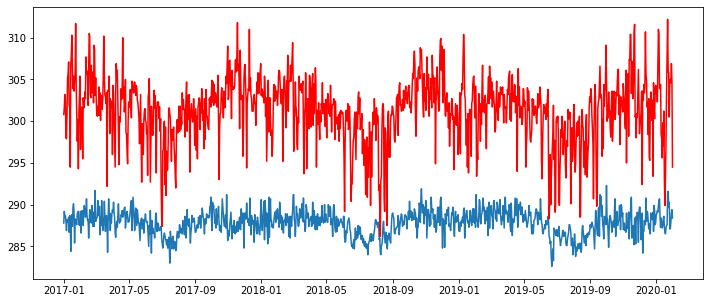

In [6]:
### gráficar resultados
print(datainit.features)

ref_long = datainit.features.longitude.loc[0]

plotdata = noaadata[np.round(noaadata.longitude, 3) == np.round(ref_long, 3)]

plt.figure(figsize=[12,5])
plt.plot(plotdata.date, plotdata['Minimum_temperature_height_above_ground_6_Hour_Interval'].values)
plt.plot(plotdata.date, plotdata['Maximum_temperature_height_above_ground_6_Hour_Interval'].values, color = 'red')
plt.show()


In [7]:
### exportar datos
noaadata.to_csv(os.path.join("results","noaa_data.csv"))

## Extraer datos CHIRPS

In [8]:
## conusltar las imageens disponibles en google earth engine para la misión en específico
datachirps = get_geedata.gee_weatherdata("2017-01-01","2020-01-31", "data/truestationlocation.csv","chirps")

datachirps.features

,longitude,latitude,index
0,-78.62869,-5.65875,1
1,-78.69203,-5.64777,2


In [9]:
## resumir los datos en una tabla
dfchirps = datachirps.CHIRPSdata_asdf()
dfchirps.head()

,precipitation,date,longitude,latitude
0,29.436226,2017-01-01,-78.62869,-5.65875
1,32.447807,2017-01-01,-78.69203,-5.64777
2,0.000000,2017-01-02,-78.62869,-5.65875
3,0.000000,2017-01-02,-78.69203,-5.64777
4,0.000000,2017-01-03,-78.62869,-5.65875


   longitude  latitude  index
0  -78.62869  -5.65875      1
1  -78.69203  -5.64777      2


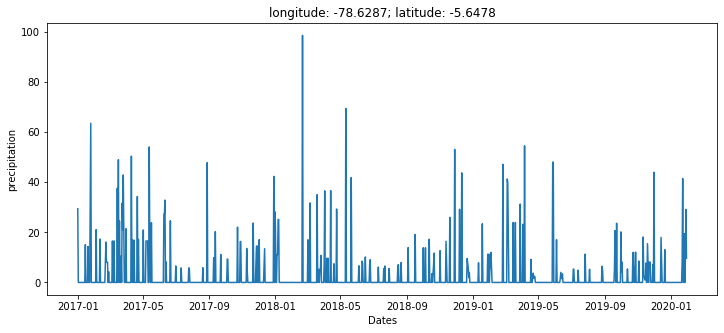

In [10]:
### gráficar resultados
print(datachirps.features)
datachirps.plot_CHIRPS(feature_index= 1)

In [11]:
### exportar datos
dfchirps.to_csv(os.path.join("D:/OneDrive - CGIAR/projects/stc_peru/results","chirpsdata.csv"))

## Extraer datos GLDAS y resumirlos a nivel diario

In [12]:
## conusltar las imageens disponibles en google earth engine para la misión en específico
datainit = get_geedata.gee_weatherdata("2017-01-01","2020-01-01", "data/truestationlocation.csv", mission = "gldas")
datainit.features

,longitude,latitude,index
0,-78.62869,-5.65875,1
1,-78.69203,-5.64777,2


Señalar que bandas serán resumidas por promedio, sumatario, mínimio o máximo.
Para mayor información consultar las bandas en: https://developers.google.com/earth-engine/datasets/catalog/NASA_GLDAS_V021_NOAH_G025_T3H

In [13]:
avgbands =  ['Tair_f_inst',
            'SWdown_f_tavg']

sumbands = ['Evap_tavg', 
            'Rainf_f_tavg']

minbands = ['Tair_f_inst']
maxbands = ['Tair_f_inst']

In [14]:
## extracción de los datos

gldasdata= datainit.summarise_hourlydata(averagecols=avgbands,
                       cummulativecols=sumbands,
                       minimumcols = minbands,
                       maximumcols = maxbands)

average features processed
cummulative features processed
minimum features processed
maximum features processed


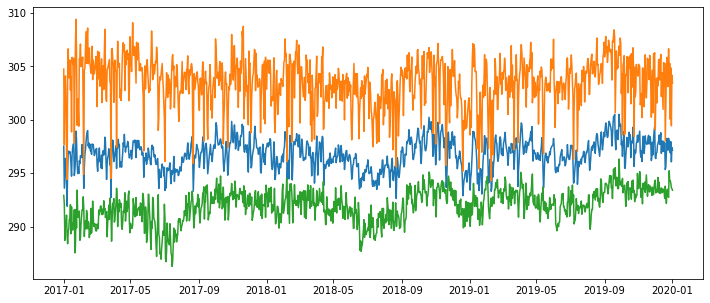

In [15]:
### gráficar resultados


ref_long = datainit.features.longitude.loc[0]

plotdata = gldasdata[np.round(gldasdata.longitude.values.astype(np.float), 1) == np.round(ref_long.astype(np.float), 1)]


plt.figure(figsize=[12,5])
plt.plot(plotdata.date, plotdata['Tair_f_inst'].values)
plt.show()

In [16]:
### exportar datos
gldasdata.to_csv(os.path.join("results","gldasdata.csv"))